<p align="center">
  <img src="https://raw.githubusercontent.com/DD-Beltran-F/cachai/main/docs/assets/cachai_logo_wide_color.svg" width="500">
</p>

### `Notebook`: _Chord Diagrams_

---

## 🧾 Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cachai.chplot as chp
import cachai.data as chd
import cachai.utilities as chu

---

## 🔠 **Correlation matrix**

For this example, we use the dataset `lithium` from **cachai**
(obtained from [M. L. L. Dantas et al. 2025](https://www.aanda.org/articles/aa/full_html/2025/04/aa53034-24/aa53034-24.html)).
Any dataset can be used, but the correlation matrix must be provided as an `numpy.ndarray` or `pandas.DataFrame`.

In [2]:
# Load the dataset
data = chd.load_dataset('lithium')
data

,CNAME,[Fe/H],A(Li),$\overline{t}_{\star}$,M,T$_{eff}$,e,Z$_{max}$,$L_z$
0,00000302-6002570,-0.31,2.01,11.220189,0.904236,5780.0,0.119362,1.003228,2028.535804
1,00001749-5449565,-0.17,1.98,9.332549,0.871635,5757.0,0.110635,0.670432,1907.144965
2,00012216-5458205,-0.07,1.51,11.748967,0.886755,5698.0,0.276396,0.996552,1836.529851
3,00040666-3709129,0.28,0.62,7.413100,0.950217,5478.0,0.112774,0.501939,1676.768299
4,00042981-4701022,-0.34,1.71,13.489632,0.829713,5702.0,0.257109,1.327526,2239.902280
...,...,...,...,...,...,...,...,...,...
1183,23520084-4303292,0.02,NaN,8.511386,0.988320,5839.0,0.187805,0.958782,1871.566073
1184,23521894-3657228,0.14,0.99,8.511386,1.087037,4960.0,0.149620,1.890008,1978.703566
1185,23552478-1454088,0.20,1.04,6.760829,1.016786,5703.0,0.071277,1.020732,1820.578262
1186,23554957-0154180,0.19,1.06,10.232935,0.949500,5555.0,0.103672,0.564511,1797.928622


In [3]:
# Correlation matrix (note we remove CNAME since is not a physical variable, its an id)
corr_matrix = data.drop(columns=['CNAME']).corr(method='spearman')
corr_matrix

,[Fe/H],A(Li),$\overline{t}_{\star}$,M,T$_{eff}$,e,Z$_{max}$,$L_z$
[Fe/H],1.000000,-0.340650,-0.208923,0.299946,-0.280956,0.033237,-0.218052,-0.269273
A(Li),-0.340650,1.000000,-0.417049,0.406327,0.792213,-0.067330,0.046326,0.098211
$\overline{t}_{\star}$,-0.208923,-0.417049,1.000000,-0.876676,-0.553685,0.101717,0.117439,0.007119
M,0.299946,0.406327,-0.876676,1.000000,0.557125,-0.014552,0.020820,-0.134426
T$_{eff}$,-0.280956,0.792213,-0.553685,0.557125,1.000000,-0.052244,0.070041,0.099788
e,0.033237,-0.067330,0.101717,-0.014552,-0.052244,1.000000,0.199433,-0.330512
Z$_{max}$,-0.218052,0.046326,0.117439,0.020820,0.070041,0.199433,1.000000,0.091320
$L_z$,-0.269273,0.098211,0.007119,-0.134426,0.099788,-0.330512,0.091320,1.000000


We can also define the names and colors for each parameter.
> Note: We already have names in the DataFrame, so in this case it is not actually necessary to define the names.

In [4]:
names  = ['[Fe/H]', 'A(Li)', r'$\overline{t}_{\star}$', 'M', r'T$_{eff}$', 'e', r'Z$_{max}$', r'L$_z$']
colors = ['#9c27b0','#4285f4','#ea4335','#fbbc05','#34a853','#8bc34a','#ff9800','#3949ab']

## 📊 **Chord Diagram**

To create a chord diagram, we just run `chp.chord()`.
A chord diagram consists of two primary elements:

1. **Nodes**: Represent matrix parameters as arc segments along the circumference (proportional to their weights).
2. **Chords**: Display correlations as links between nodes (width scales with correlation strength).


### Example: Basic diagram

The only mandatory parameter for `chord()` is the correlation matrix. This example shows the default plot:

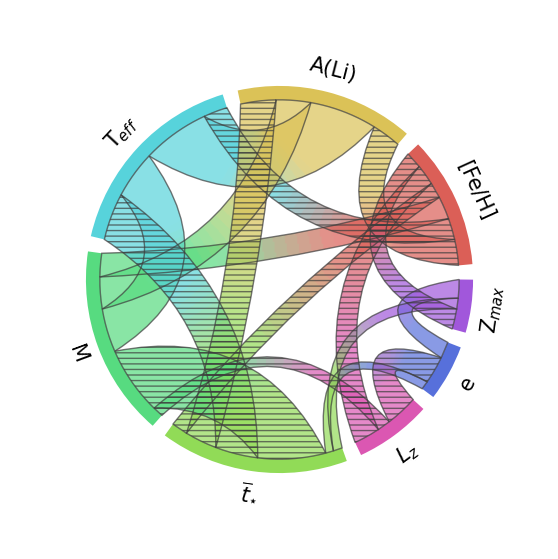

In [5]:
plt.figure(figsize=(7,7))
chp.chord(corr_matrix)


### Example: Adding a correlation sign legend

This demonstrates how to add a legend distinguishing positive and negative correlations using `legend=True`.

(to check other customizable parameters see the section below called "_Examples: Customization_")

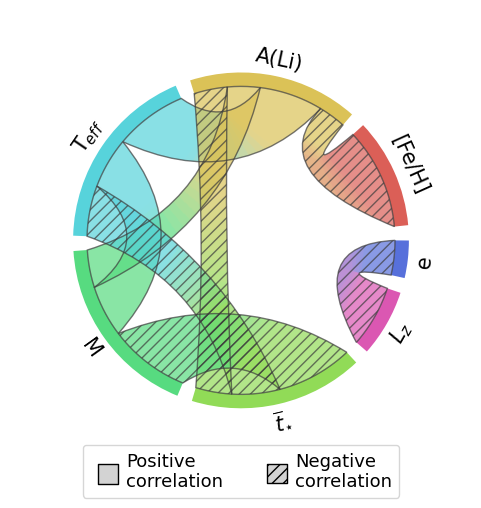

In [6]:
plt.figure(figsize=(6,6),facecolor='w')

chp.chord(corr_matrix,
          threshold=0.3,
          negative_hatch='///',
          legend=True,
          rasterized=True)

plt.legend(loc='center',bbox_to_anchor=[0.5,0],ncols=2,fontsize=13,handletextpad=0)
#chu.save_func('ChordDiagram_example_legend') # Save figure
plt.show()


### Example: Different scales for chords thickness

This example demonstrates how to adjust chord widths using either linear or logarithmic scaling via `scale='linear'` or `scale='log'`.
The logarithmic scale option is particularly useful for visualizing the difference between strong and weak correlations,
making the strongest correlations stand out even more.

(to check other customizable parameters see the section below called "_Examples: Customization_")

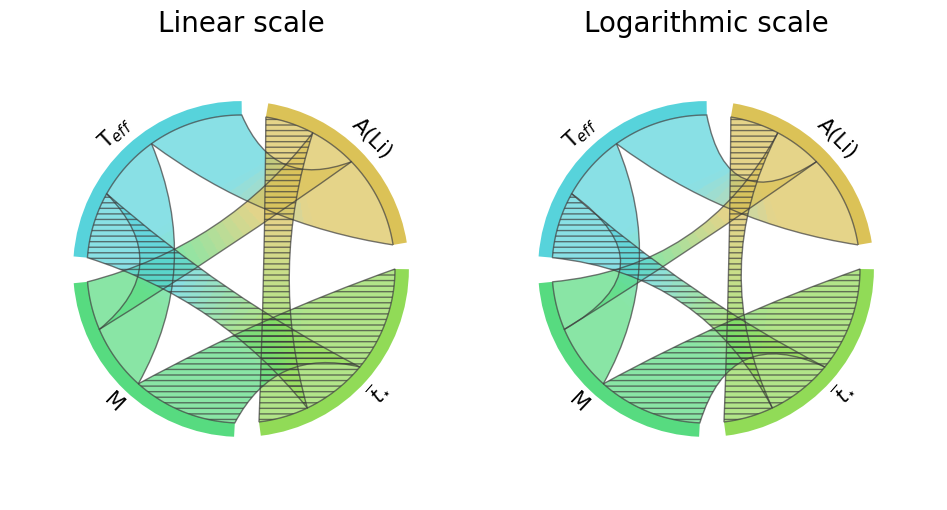

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,6),facecolor='w')

# -- Linear scale ---------------------------------------------------------------------------------
chp.chord(corr_matrix,
          ax=ax[0],
          threshold=0.4,
          scale='linear',
          rasterized=True)
ax[0].set_title('Linear scale',fontsize=20,pad=0)

# -- Log scale ------------------------------------------------------------------------------------
chp.chord(corr_matrix,
          ax=ax[1], 
          threshold=0.4,
          scale='log',
          rasterized=True)
ax[1].set_title('Logarithmic scale',fontsize=20,pad=0)

# -------------------------------------------------------------------------------------------------
plt.subplots_adjust(wspace=0)

#chu.save_func('ChordDiagram_example_scales') # Save figure
plt.show()


### Examples: Customization

This example demonstrates three variations of chord diagrams (using the same correlation matrix) displayed in subplots.
Each version has these specific adjustments:

- **Example 1:**
    - Label nodes: `names=names`
    - Bitmap rendering  for vector graphics: `rasterized=True`
    
- **Example 2:**
    - Spacing: `node_gap=0.02`
    - Chord transparency: `chord_alpha=0.3`
    - Negative correlation hatch: `negative_hatch='oo'`
    - Custom font: `font={'family': 'serif', 'size': 17}`
    - Highlights correlation: Use `highlight_chord()` and `ChordDiagram` collections

- **Example 3:**
    - Custom node colors: `colors=colors`
    - Disable color blending: `blend=False`
    - Filter weak correlations: `threshold=0.4`
    - Control chord radius: `max_rho_radius=0.5`
    - Set log-scaled chords: `scale='log'`
    - Control node labels pads: `node_labelpad=0.3`
    - Adjust widths:
        - Nodes: `node_linewidth=20`
        - Chord edges: `chord_linewidth=1.5`
    - Larger labels: `fontsize=20`
    - Add legend labels: `legend=True`

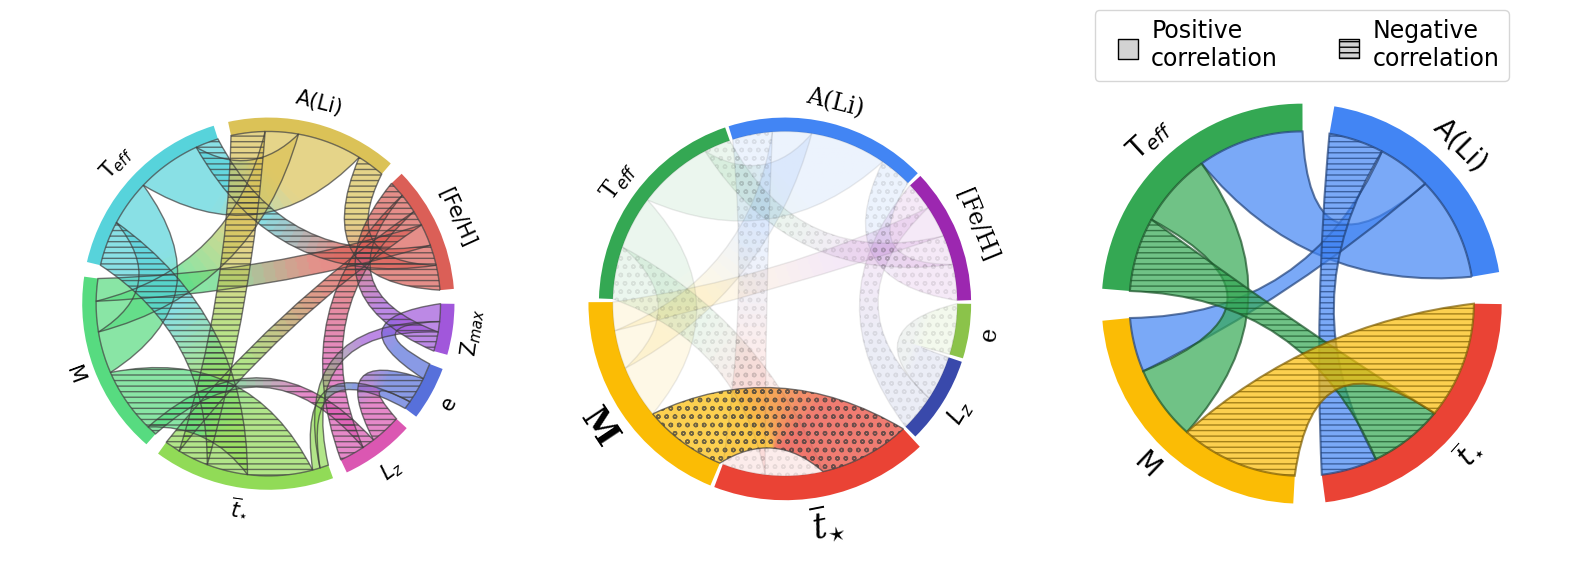

In [9]:
fig, ax = plt.subplots(1,3,figsize=(20,7),facecolor='w')

# -- Example 1 ------------------------------------------------------------------------------------
chp.chord(corr_matrix,
          ax=ax[0],
          rasterized=True)

# -- Example 2 ------------------------------------------------------------------------------------
chord_plot = chp.chord(corr_matrix,
                       colors=colors,
                       ax=ax[1],
                       threshold=0.25,
                       node_gap=0.02,
                       negative_hatch='oo',
                       font={'family':'serif','size':17},
                       rasterized=True)

# Automatic highlight
chord_plot.highlight_chord(3,3)
# Custom highlight
for n in [3,4]:
    chord_plot.node_labels[n].set_font({'size':25,
                                        'weight':'bold',
                                        'family':'serif',
                                        'math_fontfamily':'dejavuserif'})
    chord_plot.node_labels[n].set_pad(0.3)
    chord_plot.node_patches[n].set_linewidth(35)

# -- Example 3 ------------------------------------------------------------------------------------
chp.chord(corr_matrix,
          colors=colors,
          ax=ax[2],
          blend=False,
          threshold=0.4,
          max_rho_radius=0.5,
          scale='log',
          node_linewidth=20,
          chord_linewidth=1.5,
          node_labelpad=0.3,
          fontsize=20,
          show_axis=False,
          legend=True,
          rasterized=True)
ax[2].legend(loc='center',bbox_to_anchor=[0.5,1],ncols=2,fontsize=17,handletextpad=0)

# -------------------------------------------------------------------------------------------------
plt.subplots_adjust(wspace=0)

#chu.save_func('ChordDiagram_example_custom') # Save figure
plt.show()

---
